In [1]:
import json
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#import an excel reader
import openpyxl


In [2]:
results = {}
resultsTAExcess = {}
resultsUFF = {}
resultsSpread = {}
Issuance = {}
ub={}
profits = {}
avg_profits = {}
purchasing_weights = {}
price_purchasing = {}
avg_inv_p = {}
avg_inv_b = {}
plot_font = "Times New Roman"

# Load the results
numAges = 5
nProducts = 2
targetAges = [2,4]
ages = [i for i in range(numAges)]
prod_threshold = [4 for _ in range(nProducts)]


sf_levels = [3,5]
sr_levels = [2,3,4,5]
ps_levels = [15,20,25,30]

# Function to handle non-numeric entries
def safe_int(x):
    try:
        return int(x)
    except (ValueError, TypeError):
        return None  # or np.nan, depending on how you want to handle it
    


for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            currentInstance = f"2nP_{sf}sF_PUpU_{sr}sprRev_0.25oDP_{ps}pS"
            results[(sf,sr,ps)] = json.load(open(f"{os.getcwd()}\Analysis\Simulation_Aggregated\{currentInstance}_Simulation.json"))
            print("Loaded ", currentInstance)
            currentInstance = f"2nP_{sf}sF_PUpU_{sr}sprRev_0.25oDP_{ps}pS"
            resultsTAExcess[(sf,sr,ps)] = {}
            resultsTAExcess[(sf,sr,ps)]["overall"] = results[(sf,sr,ps)]["avgTargetAgeExcess"]
            resultsTAExcess[(sf,sr,ps)]["product"] = results[(sf,sr,ps)]["avgTargetAgeExcessProduct"]
            Issuance[(sf,sr,ps)] = results[(sf,sr,ps)]["averageSellingProduct"]
            resultsUFF[(sf,sr,ps)] = results[(sf,sr,ps)]["serviceLevels"]
            avg_inv_p[(sf,sr,ps)] = results[(sf,sr,ps)]["ageStructurePurchasing"]
            avg_inv_b[(sf,sr,ps)] = results[(sf,sr,ps)]["ageStructureBlending"]
            resultsSpread[(sf,sr,ps)] = results[(sf,sr,ps)]["percentageWide"]["1"]
            price_purchasing[(sf,sr,ps)] = results[(sf,sr,ps)]["pricePurchasing"]
            avg_profits[(sf,sr,ps)] = results[(sf,sr,ps)]["averageReward"]
            profits[(sf,sr,ps)] = results[(sf,sr,ps)]["rewardSequence"]
            ub[(sf,sr,ps)] = json.load(open(f"{os.getcwd()}\ScaledCase\{currentInstance}_Opt.json"))
            #read purchasing weights from excel
            wb = openpyxl.open(f"{os.getcwd()}\Analysis\Simulation_Aggregated\{currentInstance}_Simulation.xlsx", data_only=True)
            ws = wb.active
            
            #the values are in row 42, columns 2 to 13
            purchasing_weights[(sf, sr, ps)] = []
            for i in range(2,15):
                purchasing_weights[(sf, sr, ps)].append(ws.cell(row=42, column=i).value)
            print(purchasing_weights[(sf, sr, ps)])
            results[(sf,sr,ps)] = None

            # resultsTAExcess[(sf,sr,ps)] = json.load(open(f"results/TAExcess_sf{sf}_sr{sr}_ps{ps}.json"))
            # resultsUFF[(sf,sr,ps)] = json.load(open(f"results/UFF_sf{sf}_sr{sr}_ps{ps}.json"))
            # resultsSpread[(sf,sr,ps)] = json.load(open(f"results/Spread_sf{sf}_sr{sr}_ps{ps}.json"))


Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_15pS
[5e-08, 1.65e-06, 9e-05, 0.001776, 0.0096277, 0.0284421, 0.0608476, 0.0900114, 0.128259, 0.11637615, 0.1472185, 0.12860145, 0.2887484]
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_20pS
[1.55e-06, 4.875e-05, 0.0006879, 0.0037748, 0.01769665, 0.03595025, 0.06154195, 0.08599085, 0.11896475, 0.105744, 0.12842325, 0.1198365, 0.3213388]
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_25pS
[1.605e-05, 0.0002986, 0.00215395, 0.0068965, 0.02601025, 0.03973955, 0.0566016, 0.09103215, 0.10214195, 0.1014017, 0.1119789, 0.10838605, 0.35334275]
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_30pS
[5.84e-05, 0.00092805, 0.00403095, 0.01328225, 0.0290935, 0.03945105, 0.06752415, 0.0788372, 0.09041645, 0.0976917, 0.0967863, 0.097054, 0.384846]
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_15pS
[1e-07, 4.6e-06, 0.00032865, 0.00262745, 0.0118251, 0.0340517, 0.07442555, 0.11059325, 0.13055715, 0.1189413, 0.10804235, 0.13641385, 0.27218895]
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_20pS
[4.9e-06, 0.00012335,

{(3, 2, 15): [0.9764575625, 0.990884], (3, 2, 20): [0.974171275, 0.990631375], (3, 2, 25): [0.971788025, 0.990365025], (3, 2, 30): [0.9690014625, 0.990174375], (3, 3, 15): [0.9322990125, 0.9937848125], (3, 3, 20): [0.918644525, 0.9935080875], (3, 3, 25): [0.902487525, 0.99322675], (3, 3, 30): [0.8857385, 0.992869775], (3, 4, 15): [0.79337955, 0.9942250875], (3, 4, 20): [0.757886525, 0.9933124625], (3, 4, 25): [0.7227407875, 0.99259005], (3, 4, 30): [0.6892117875, 0.9918712875], (3, 5, 15): [0.4511617125, 0.9919659], (3, 5, 20): [0.4547084, 0.99130045], (3, 5, 25): [0.4576224625, 0.9907159], (3, 5, 30): [0.460230275, 0.9902587125], (5, 2, 15): [0.9765869, 0.990911925], (5, 2, 20): [0.9742450625, 0.9906659625], (5, 2, 25): [0.9718098875, 0.9903848375], (5, 2, 30): [0.96926535, 0.99023665], (5, 3, 15): [0.932930525, 0.99384645], (5, 3, 20): [0.918945575, 0.9935296875], (5, 3, 25): [0.902730625, 0.993236375], (5, 3, 30): [0.88651585, 0.9929159875], (5, 4, 15): [0.7948029375, 0.9942478375],

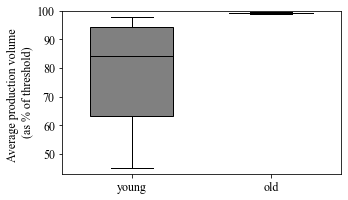

0.990174375


In [4]:
#create boxplot of production volumes for each product across all problem instances
print(resultsUFF)
instances = list(resultsUFF.keys())

prod_levels = {0: [resultsUFF[i][0] for i in instances], 1: [resultsUFF[i][1] for i in instances]}

# Create the boxplot
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig, ax = plt.subplots((1), figsize=(5,3))
#add boxplot with default colors
plt.boxplot(prod_levels.values(), patch_artist=True, showfliers=False, widths=0.6, boxprops=dict(facecolor="grey"), whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="black") )

#plt.xlabel("Product")
plt.xticks([1,2], ["young", "old"])
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], ["50","60","70","80","90","100"])
plt.ylim(0.43,1.0)
plt.ylabel("Average production volume \n (as % of threshold)")
plt.savefig(f"{os.getcwd()}\Figures\production_volumes.pdf", bbox_inches='tight')
plt.show()

#get minumum production of older product
min_prod = min(prod_levels[1])
print(min_prod)

#get percentage reduction of production vs upper bound
# prod_levels = {0: [resultsUFF[i][0] for i in instances], 1: [resultsUFF[i][1] for i in instances]}
# print(prod_levels)	
# prod_levels_ub = {0: [sum(results[(i[0],i[1],i[2])]["ub"]["ub_base"]["salesDiv"]["1"]) for i in instances], 1: [sum(results[(i[0],i[1],i[2])]["ub"]["ub_base"]["salesDiv"]["2"]) for i in instances]}
# print(prod_levels_ub)
# percentage_reduction = {0: (sum(prod_levels[0]))/(sum(prod_levels_ub[0])/4), 1: (sum(prod_levels[1]))/(sum(prod_levels_ub[1])/4)}
# print(percentage_reduction)

[8.2219969, 6.84837155, 5.08109515, 2.86174665, 1.61579075]
[8.701889396844685, 6.332210809429339, 6.096294657627282, 2.040316806605848, 2.0]
[0.973739, 1.57062635, 2.1409234, 1.2133536, 1.6157907500000002]
[2.0, 0.0, 4.0, 0.0, 2.0]


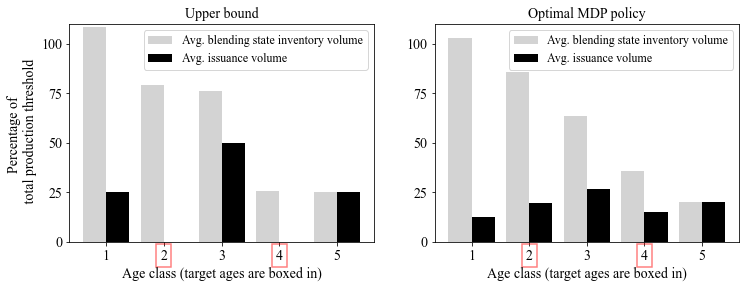

In [28]:
#contrast average blending state inventory structure and avg issuance in MDP solution and upper bound
problem_instance = (3,3,30)
ages = np.array(ages)
print(avg_inv_b[problem_instance])
print(ub[problem_instance]["ub_base"]["blendingInv"])

print([sum(Issuance[problem_instance][str(i)][age] for i in range(1,3)) for age in range(5)])
print(ub[problem_instance]["ub_base"]["Sales"])

#show results in two bar plots, one for MDP solution and one for upper bound
# Create the bar plot
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)
plt.rc('legend', title_fontsize=14)
#set title fontsize
plt.rc('axes', titlesize=14)
fig, ax = plt.subplots(1, 2, figsize=(12,4))

#add bar plot with default colors
ax[0].bar(ages-0.2, np.array(ub[problem_instance]["ub_base"]["blendingInv"])/8, color="lightgrey", width=0.4)
ax[0].bar(ages+0.2, np.array(ub[problem_instance]["ub_base"]["Sales"])/8, color="black", width=0.4)
ax[0].set_title("Upper bound")
ax[0].set_xticks(ages,[str(i+1) for i in ages])
ax[0].set_ylabel("Percentage of \n total production threshold")
ax[0].set_yticks([0,0.25,0.5,0.75,1.0], ["0","25","50","75","100"])
ax[0].set_ylim(0,1.1)
ax[0].set_xlabel("Age class (target ages are boxed in)")

#create a box around the target ages in axis tick labels
for i in targetAges:
    ax[0].get_xticklabels()[i-1].set_bbox(dict(facecolor='none', alpha=0.5, edgecolor='red', linewidth=1.5))

#add bar plot with default colors
ax[1].bar(ages-0.2, np.array(avg_inv_b[problem_instance])/8, color="lightgrey", width=0.4)
ax[1].bar(ages+0.2, np.array([sum(Issuance[problem_instance][str(i)][age] for i in range(1,3)) for age in range(5)])/8, color="black", width=0.4)
ax[1].set_title("Optimal MDP policy")
ax[1].set_xticks(ages,[str(i+1) for i in ages])
#ax[1].set_ylabel("Percentage of \n total production threshold")
ax[1].set_yticks([0,0.25,0.5,0.75,1.0], ["0","25","50","75","100"])
ax[1].set_ylim(0,1.1)
ax[1].set_xlabel("Age class (target ages are boxed in)")

for i in targetAges:
    ax[1].get_xticklabels()[i-1].set_bbox(dict(facecolor='none', alpha=0.5, edgecolor='red', linewidth=1.5))

#add legend
ax[0].legend(["Avg. blending state inventory volume", "Avg. issuance volume"], loc="upper right")
ax[1].legend(["Avg. blending state inventory volume", "Avg. issuance volume"], loc="upper right")

plt.savefig(f"{os.getcwd()}\Figures\inventory_structure_example.pdf", bbox_inches='tight')


[0.0006402916895722525, 0.010151888341396338, 0.07308199267855135, 0.23887379502039216, 0.35450406454017624, 0.23887379502039197, 0.07308199267855124, 0.010151888341396314, 0.0006402916895722503] 1.0000000000000002
[0.008260557348502371, 0.03754964534506602, 0.11074333989680216, 0.21190669782864596, 0.2630795191619668, 0.211906697828646, 0.1107433398968022, 0.03754964534506603, 0.008260557348502374] 0.9999999999999999
[0.02938806847450984, 0.06811063828834128, 0.1241539662511077, 0.1779950754547312, 0.20070450306262, 0.1779950754547312, 0.1241539662511077, 0.06811063828834128, 0.029388068474509848] 1.0000000000000002
[0.06567883920938473, 0.09433386538911619, 0.12217531293620874, 0.1426832384847979, 0.1502574879609846, 0.14268323848479794, 0.12217531293620877, 0.09433386538911624, 0.06567883920938478] 0.9999999999999999
[15, 20, 25, 30]
{0: [2.0012598345767842, 2.002860149002032, 2.0057410025195566, 2.01030630539425, 2.0008133790659786, 2.0020361113021385, 2.0040686988997436, 2.0075001

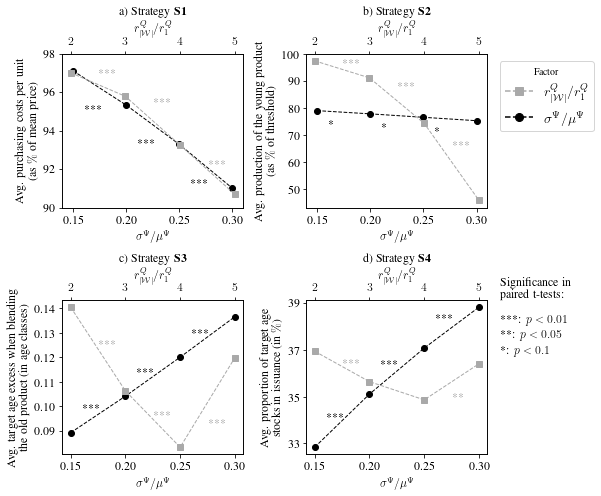

In [6]:
from matplotlib.lines import Line2D

price_levels = [70,90,110,130,150,170,190,210,230]
mean_price = 150
sigma_level = {15:1.125395, 20:1.52036, 25:2.04058, 30:3.10915}
muH = 4
yieldProbability = {}
for ps in ps_levels:
    sigmaH = sigma_level[ps]
    _lambda = np.exp((2*muH-1)/(2*(sigmaH**2)))
    qNorm = np.exp(-1/(sigmaH**2))
    pmfDivisor=sum((_lambda**j)*(qNorm**(j*(j-1)/2)) for j in range(-200,201))
    untruncYield = {i: ((_lambda**i)*(qNorm**(i*(i-1)/2)))/pmfDivisor for i in range(len(price_levels))}
    yieldProbability[ps] = [untruncYield[i]/sum(untruncYield.values()) for i in range(len(price_levels))]
    print(yieldProbability[ps], sum(yieldProbability[ps]))

#calculate average purchasing price
average_price = {p: sum([price_levels[i]*yieldProbability[p[2]][i]*np.dot(price_purchasing[p][str(i)],[k for k in range(13)]) for i in range(len(price_levels))])/sum(yieldProbability[p[2]][i]*np.dot(price_purchasing[p][str(i)],[k for k in range(13)]) for i in range(len(price_levels))) for p in instances}
average_price_ps = {ps: np.mean([average_price[i] for i in instances if i[2]==ps]) for ps in ps_levels}
average_price_sr = {sr: np.mean([average_price[i] for i in instances if i[1]==sr]) for sr in sr_levels}

print(ps_levels)

#calculate significance of difference in average price between different levels of ps and sr
from scipy.stats import ttest_rel

# calculate percentage target age excess
tae_levels = {0: [resultsTAExcess[i]["product"]["1"]*2 for i in instances], 1: [resultsTAExcess[i]["product"]["2"]*4 for i in instances]}
print(tae_levels)
#average age
average_age = {0: sum(tae_levels[0])/len(instances) * 2, 1: sum(tae_levels[1])/len(instances) * 4}
print(average_age)

#calculate percentage spread
spread_levels = [resultsSpread[i] for i in instances]
print(spread_levels)
average_spread = sum(spread_levels)/len(instances)
print(average_spread)

print("Average target age proportion in issuance: ", {np.mean([(Issuance[i]["1"][1]+Issuance[i]["2"][3])/(sum(Issuance[i]["1"])+sum(Issuance[i]["2"])) for i in instances])})

#get average uff, taexcess and spread for each level of factors ps and sr
uff_levels = {}
tae_levels = {}
spread_levels = {}
avg_price = {}
for ps in ps_levels:
    #avg_price[ps] = 
    uff_levels[ps] = [resultsUFF[i][0] for i in instances if i[2] == ps]
    tae_levels[ps] = [resultsTAExcess[i]["product"]["2"]*4 for i in instances if i[2] == ps]
    spread_levels[ps] = [(Issuance[i]["1"][1]+Issuance[i]["2"][3])/(sum(Issuance[i]["1"])+sum(Issuance[i]["2"])) for i in instances if i[2] == ps]
for sr in sr_levels:
    uff_levels[sr] = [resultsUFF[i][0] for i in instances if i[1] == sr]
    tae_levels[sr] = [resultsTAExcess[i]["product"]["2"]*4 for i in instances if i[1] == sr]
    spread_levels[sr] = [(Issuance[i]["1"][1]+Issuance[i]["2"][3])/(sum(Issuance[i]["1"])+sum(Issuance[i]["2"])) for i in instances if i[1] == sr]

print(uff_levels)
print(tae_levels)
print(spread_levels)


#calculate t-test for difference in average price, uff, taexcess and spread between different levels of ps and sr
ttest_price = {}
ttest_uff = {}
ttest_tae = {}
ttest_spread = {}

for ps in ps_levels:
    for ps1 in ps_levels[ps_levels.index(ps)+1:]:
        ttest_price[(ps,ps1)] = ttest_rel([average_price[i] for i in instances if i[2] == ps], [average_price[i] for i in instances if i[2] == ps1])
        ttest_uff[(ps,ps1)] = ttest_rel(uff_levels[ps], uff_levels[ps1])
        ttest_tae[(ps,ps1)] = ttest_rel(tae_levels[ps], tae_levels[ps1])
        ttest_spread[(ps,ps1)] = ttest_rel(spread_levels[ps], spread_levels[ps1])
        print(ps, ps1)
        print("Price: ", ttest_price[(ps,ps1)])
        print("UFF: ",ttest_uff[(ps,ps1)])
        print("TAE: ", ttest_tae[(ps,ps1)])
        print("SLV: ",ttest_spread[(ps,ps1)]) 

for sr in sr_levels:
    for sr1 in sr_levels[sr_levels.index(sr)+1:]:
        ttest_price[(sr,sr1)] = ttest_rel([average_price[i] for i in instances if i[1] == sr], [average_price[i] for i in instances if i[1] == sr1])
        ttest_uff[(sr,sr1)] = ttest_rel(uff_levels[sr], uff_levels[sr1])
        ttest_tae[(sr,sr1)] = ttest_rel(tae_levels[sr], tae_levels[sr1])
        ttest_spread[(sr,sr1)] = ttest_rel(spread_levels[sr], spread_levels[sr1])
        print(sr, sr1)
        print("Price: ", ttest_price[(sr,sr1)])
        print("UFF: ",ttest_uff[(sr,sr1)])
        print("TAE: ", ttest_tae[(sr,sr1)])
        print("SLV: ",ttest_spread[(sr,sr1)])

#change math font and set overall font size

plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
# Enable LaTeX rendering for `\textbf`
plt.rcParams['text.usetex'] = True
#make latex font look like Times New Roman
plt.rcParams['text.latex.preamble'] = r'\usepackage{newtxtext}'




print("ps_levels", ps_levels)
print("sr_levels", sr_levels)

#plot avgprice, uff, taexcess and spread for each level of factors ps and [sr], put ps on x-axis bottom and sr on x-axis top
fig, ax = plt.subplots(2, 2, figsize=(7,7))

#plot average price as line plot for different values of ps and sr
ax[0,0].plot(ps_levels, [average_price_ps[ps]/mean_price for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)
ax[0,0].set_ylabel("Avg. purchasing costs per unit \n (as $\%$ of mean price)")
ax[0,0].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[0,0].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])
ax[0,0].set_yticks([0.90,0.92,0.94,0.96,0.98], ["90","92","94","96","98"])
ax[0,0].set_title(r"a) Strategy $\textbf{S1}$")
ax[0,0].set_ylim(0.9,0.98)
# ax[0,0].set_ylim(0.43,1.0)
ax[0,0].set_xlim(14,31)

#add text label for significance of difference in average price between different levels of ps using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
for ps in ps_levels[:-1]:
    ps1 = ps_levels[ps_levels.index(ps)+1]
    if ttest_price[(ps,ps1)].pvalue < 0.01:
        ax[0,0].text(ps+1, average_price_ps[ps]/mean_price - 0.02, "***", fontsize=12, color="black")
    elif ttest_price[(ps,ps1)].pvalue < 0.05:
        ax[0,0].text(ps+1, average_price_ps[ps]/mean_price - 0.02, "**", fontsize=12, color="black")
    elif ttest_price[(ps,ps1)].pvalue < 0.1:
        ax[0,0].text(ps+1, average_price_ps[ps]/mean_price - 0.02, "*", fontsize=12, color="black")

ax2 = ax[0,0].twiny()
ax2.plot(sr_levels, [average_price_sr[sr]/mean_price for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)

#add text label for significance of difference in average price between different levels of sr using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
shift = {2: 0.00, 3: -0.003, 4: -0.01}
for sr in sr_levels[:-1]:
    sr1 = sr_levels[sr_levels.index(sr)+1]
    if ttest_price[(sr,sr1)].pvalue < 0.01:
        ax2.text(sr+0.5, average_price_sr[sr]/mean_price + shift[sr], "***", fontsize=12, color="darkgrey")
    elif ttest_price[(sr,sr1)].pvalue < 0.05:
        ax2.text(sr+0.5, average_price_sr[sr]/mean_price + shift[sr], "**", fontsize=12, color="darkgrey")
    elif ttest_price[(sr,sr1)].pvalue < 0.1:
        ax2.text(sr+0.5, average_price_sr[sr]/mean_price + shift[sr], "*", fontsize=12, color="darkgrey")

#mean uff as line plot for different values of ps and sr
ax[0,1].plot(ps_levels, [sum(uff_levels[ps])/len(uff_levels[ps]) for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)
    
ax[0,1].set_ylabel("Avg. production of the young product \n (as $\%$ of threshold)")
ax[0,1].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[0,1].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])
ax[0,1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0], ["50","60","70","80","90","100"])
ax[0,1].set_title(r"b) Strategy $\textbf{S2}$")
ax[0,1].set_ylim(0.43,1.0)
ax[0,1].set_xlim(14,31)

#add text label for significance of difference in average uff between different levels of ps using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
for ps in ps_levels[:-1]:
    ps1 = ps_levels[ps_levels.index(ps)+1]
    if ttest_uff[(ps,ps1)].pvalue < 0.01:
        ax[0,1].text(ps+1, sum(uff_levels[ps])/len(uff_levels[ps]) - 0.05, "***", fontsize=12, color="black")
    elif ttest_uff[(ps,ps1)].pvalue < 0.05:
        ax[0,1].text(ps+1, sum(uff_levels[ps])/len(uff_levels[ps]) - 0.05, "**", fontsize=12, color="black")
    elif ttest_uff[(ps,ps1)].pvalue < 0.1:
        ax[0,1].text(ps+1, sum(uff_levels[ps])/len(uff_levels[ps]) - 0.05, "*", fontsize=12, color="black")

ax2 = ax[0,1].twiny()
ax2.plot(sr_levels, [sum(uff_levels[sr])/len(uff_levels[sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)

#add text label for significance of difference in average uff between different levels of sr using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
shift = {2: -0.01, 3: -0.03, 4: -0.08}
for sr in sr_levels[:-1]:
    sr1 = sr_levels[sr_levels.index(sr)+1]
    if ttest_uff[(sr,sr1)].pvalue < 0.01:
        ax2.text(sr+0.5, sum(uff_levels[sr])/len(uff_levels[sr]) + shift[sr], "***", fontsize=12, color="darkgrey")
    elif ttest_uff[(sr,sr1)].pvalue < 0.05:
        ax2.text(sr+0.5, sum(uff_levels[sr])/len(uff_levels[sr]) + shift[sr], "**", fontsize=12, color="darkgrey")
    elif ttest_uff[(sr,sr1)].pvalue < 0.1:
        ax2.text(sr+0.5, sum(uff_levels[sr])/len(uff_levels[sr]) + shift[sr], "*", fontsize=12, color="darkgrey")

#mean taexcess as line plot for different values of ps and sr


ax[1,0].plot(ps_levels, [sum(tae_levels[ps])/len(tae_levels[ps]) for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)

ax[1,0].set_ylabel("Avg. target age excess when blending \n the old product (in age classes)")
ax[1,0].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[1,0].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])
ax[1,0].set_yticks([4.09,4.1,4.11,4.12,4.13,4.14], ["0.09","0.10","0.11","0.12","0.13","0.14"])
ax[1,0].set_title(r"c) Strategy $\textbf{S3}$")

#add text label for significance of difference in average taexcess between different levels of ps using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
for ps in ps_levels[:-1]:
    ps1 = ps_levels[ps_levels.index(ps)+1]
    if ttest_tae[(ps,ps1)].pvalue < 0.01:
        ax[1,0].text(ps+1, sum(tae_levels[ps])/len(tae_levels[ps]) + 0.01, "***", fontsize=12, color="black")
    elif ttest_tae[(ps,ps1)].pvalue < 0.05:
        ax[1,0].text(ps+1, sum(tae_levels[ps])/len(tae_levels[ps]) + 0.01, "**", fontsize=12, color="black")
    elif ttest_tae[(ps,ps1)].pvalue < 0.1:
        ax[1,0].text(ps+1, sum(tae_levels[ps])/len(tae_levels[ps]) + 0.01, "*", fontsize=12, color="black")

ax2 = ax[1,0].twiny()

ax2.plot(sr_levels, [sum(tae_levels[sr])/len(tae_levels[sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)

#add text label for significance of difference in average taexcess between different levels of sr using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
shift = {2: -0.015, 3: -0.01, 4: +0.01}
for sr in sr_levels[:-1]:
    sr1 = sr_levels[sr_levels.index(sr)+1]
    if ttest_tae[(sr,sr1)].pvalue < 0.01:
        ax2.text(sr+0.5, sum(tae_levels[sr])/len(tae_levels[sr]) + shift[sr], "***", fontsize=12, color="darkgrey")
    elif ttest_tae[(sr,sr1)].pvalue < 0.05:
        ax2.text(sr+0.5, sum(tae_levels[sr])/len(tae_levels[sr]) + shift[sr], "**", fontsize=12, color="darkgrey")
    elif ttest_tae[(sr,sr1)].pvalue < 0.1:
        ax2.text(sr+0.5, sum(tae_levels[sr])/len(tae_levels[sr]) + shift[sr], "*", fontsize=12, color="darkgrey")

#mean spread as line plot for different values of ps and sr


ax[1,1].plot(ps_levels, [sum(spread_levels[ps])/len(spread_levels[ps]) for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)

ax[1,1].set_ylabel("Avg. proportion of target age \n stocks in issuance (in $\%$)")
ax[1,1].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[1,1].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])

ax[1,1].set_yticks([0.33,0.35,0.37,0.39], ["33","35","37","39"])

#add text label for significance of difference in average spread between different levels of ps using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
for ps in ps_levels[:-1]:
    ps1 = ps_levels[ps_levels.index(ps)+1]
    if ttest_spread[(ps,ps1)].pvalue < 0.01:
        ax[1,1].text(ps+1, sum(spread_levels[ps])/len(spread_levels[ps]) + 0.013, "***", fontsize=12, color="black")
    elif ttest_spread[(ps,ps1)].pvalue < 0.05:
        ax[1,1].text(ps+1, sum(spread_levels[ps])/len(spread_levels[ps]) + 0.013, "**", fontsize=12, color="black")
    elif ttest_spread[(ps,ps1)].pvalue < 0.1:
        ax[1,1].text(ps+1, sum(spread_levels[ps])/len(spread_levels[ps]) + 0.013, "*", fontsize=12, color="black")

ax2 = ax[1,1].twiny()

ax2.plot(sr_levels, [sum(spread_levels[sr])/len(spread_levels[sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)

#add text label for significance of difference in average spread between different levels of sr using stars with *** for p<0.01, ** for p<0.05 and * for p<0.1
shift = {2: -0.005, 3: -0.0, 4: +0.001}
for sr in sr_levels[:-1]:
    sr1 = sr_levels[sr_levels.index(sr)+1]
    if ttest_spread[(sr,sr1)].pvalue < 0.01:
        ax2.text(sr+0.5, sum(spread_levels[sr])/len(spread_levels[sr]) + shift[sr], "***", fontsize=12, color="darkgrey")
    elif ttest_spread[(sr,sr1)].pvalue < 0.05:
        ax2.text(sr+0.5, sum(spread_levels[sr])/len(spread_levels[sr]) + shift[sr], "**", fontsize=12, color="darkgrey")
    elif ttest_spread[(sr,sr1)].pvalue < 0.1:
        ax2.text(sr+0.5, sum(spread_levels[sr])/len(spread_levels[sr]) + shift[sr], "*", fontsize=12, color="darkgrey")

ax[1,1].set_title(r"d) Strategy $\textbf{S4}$")


# Create the custom handles for the legend (circle and square)
legend_elements = [
    Line2D([0], [0], marker='s', color='darkgrey', linestyle='--', markersize=8, label=r"${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$"),  # Square,
    Line2D([0], [0], marker='o', color='black', linestyle='--', markersize=8, label=r"${\sigma^{\Psi}}/{\mu^{\Psi}}$")  # Circle
]

fig.tight_layout()

#add a legend outside the plot
fig.legend(handles=legend_elements, title="Factor",
           loc="center right", bbox_to_anchor=(1.2,0.8), markerscale=1.0, fontsize=14)

#add text legend for significance levels
fig.text(1.0001, 0.4, "Significance in \n paired t-tests:", fontsize=12, color="black")
fig.text(1.0001, 0.35, "***: $p<0.01$", fontsize=12, color="black")
fig.text(1.0001, 0.32, "**: $p<0.05$", fontsize=12, color="black")
fig.text(1.0001, 0.29, "*: $p<0.1$", fontsize=12, color="black")


plt.savefig(f"{os.getcwd()}\\Figures\\uff_taexcess_spread.pdf", bbox_inches='tight')
plt.show()



{(3, 2, 15): 9.606635449999999, (3, 2, 20): 9.59638805, (3, 2, 25): 9.58676885, (3, 2, 30): 9.57563715, (3, 3, 15): 9.408981350000001, (3, 3, 20): 9.34530795, (3, 3, 25): 9.27023385, (3, 3, 30): 9.191468650000001, (3, 4, 15): 8.751950949999998, (3, 4, 20): 8.58392365, (3, 4, 25): 8.41807045, (3, 4, 30): 8.260577900000001, (3, 5, 15): 7.132048299999998, (3, 5, 20): 7.150454049999999, (3, 5, 25): 7.166160950000001, (3, 5, 30): 7.179574250000001, (5, 2, 15): 9.595856999999999, (5, 2, 20): 9.5865127, (5, 2, 25): 9.5752571, (5, 2, 30): 9.5658695, (5, 3, 15): 9.402029200000001, (5, 3, 20): 9.33568895, (5, 3, 25): 9.259622, (5, 3, 30): 9.1844815, (5, 4, 15): 8.748260949999997, (5, 4, 20): 8.58052055, (5, 4, 25): 8.41633965, (5, 4, 30): 8.25691445, (5, 5, 15): 7.130810099999999, (5, 5, 20): 7.152194499999999, (5, 5, 25): 7.164232149999999, (5, 5, 30): 7.17760795}
T-test for purchasing covs between different levels of ps
15 20 TtestResult(statistic=-5.4437531336903495, pvalue=0.0009623852110225

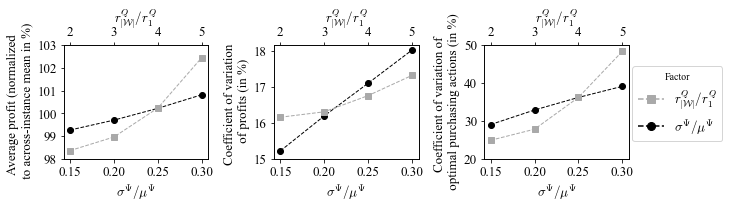

In [10]:
#get purchasing volatilities
purchasing_means = {i: np.average([i for i in range(13)], weights=purchasing_weights[i]) for i in instances}
purchasing_variances = {i: np.average([(k - purchasing_means[i])**2 for k in range(13)], weights=purchasing_weights[i]) for i in instances}
print(purchasing_means)
purchasing_stds = {i: np.sqrt(purchasing_variances[i]) for i in instances}
purchasing_covs = {i: purchasing_stds[i]/purchasing_means[i] for i in instances}

#create plot of purchasing covs dependent on ps
#set fontsize
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=13)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
# Enable LaTeX rendering for `\textbf`
plt.rcParams['text.usetex'] = False
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=13)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)


fig, ax = plt.subplots(1, 3, figsize=(9,3))

#calculate significance of difference in purchasing covs between different levels of ps using paired t-test
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp
print("T-test for purchasing covs between different levels of ps")
for i in range(len(ps_levels)):
    for j in range(i+1, len(ps_levels)):
        print(ps_levels[i], ps_levels[j], ttest_rel(np.array([purchasing_covs[k] for k in instances if k[2] == ps_levels[i]]),np.array([purchasing_covs[k] for k in instances if k[2] == ps_levels[j]])))

#calculate significance of difference in purchasing covs between different levels of sr using paired t-test
print("T-test for purchasing covs between different levels of sr")
for i in range(len(sr_levels)):
    for j in range(i+1, len(sr_levels)):
        print(sr_levels[i], sr_levels[j], ttest_rel(np.array([purchasing_covs[k] for k in instances if k[1] == sr_levels[i]]),np.array([purchasing_covs[k] for k in instances if k[1] == sr_levels[j]])) )



ax[2].plot(ps_levels, [np.mean([purchasing_covs[i] for i in instances if i[2]==ps]) for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)
#add std as error bars
ax[2].set_ylabel("Coefficient of variation of \n optimal purchasing actions (in %)")
ax[2].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[2].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])

ax2 = ax[2].twiny()
ax2.plot(sr_levels, [np.mean([purchasing_covs[i] for i in instances if i[1]==sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)
ax[2].set_yticks([0.2, 0.3, 0.4, 0.5], ["20","30","40","50"]) 

#create plot of average profits dependent on ps
ax[0].plot(ps_levels, [np.mean([avg_profits[i] for i in instances if i[2]==ps])/np.mean([avg_profits[i] for i in instances]) * 100 for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)
ax[0].set_ylabel("Average profit (normalized \n to across-instance mean in %)")
ax[0].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[0].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])


ax2 = ax[0].twiny()
ax2.plot(sr_levels, [np.mean([avg_profits[i] for i in instances if i[1]==sr])/np.mean([avg_profits[i] for i in instances]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)
ax[0].set_yticks([98,99,100,101,102,103])

#create plot of average profit std dependent on ps
ax[1].plot(ps_levels, [np.mean([np.std(profits[i])/avg_profits[i] for i in instances if i[2] == ps]) * 100 for ps in ps_levels], marker='o', color="black", linestyle="--", linewidth=1)
ax[1].set_ylabel("Coefficient of variation \n of profits (in %)")
ax[1].set_xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
ax[1].set_xticks(ps_levels, ["0.15","0.20","0.25","0.30"])

ax2 = ax[1].twiny()
ax2.plot(sr_levels, [np.mean([np.std(profits[i])/avg_profits[i] for i in instances if i[1] == sr]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax2.set_xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
ax2.set_xticks(sr_levels)
ax[1].set_yticks([15, 16, 17, 18], ["15","16","17","18"])

# Create the custom handles for the legend (circle and square)
legend_elements = [
    Line2D([0], [0], marker='s', color='darkgrey', linestyle='--', markersize=8, label=r"${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$"),  # Square,
    Line2D([0], [0], marker='o', color='black', linestyle='--', markersize=8, label=r"${\sigma^{\Psi}}/{\mu^{\Psi}}$")  # Circle
]

fig.tight_layout()

#add a legend outside the plot
fig.legend(handles=legend_elements, title="Factor",
           loc="center right", bbox_to_anchor=(1.13,0.5), markerscale=1.0, fontsize=13)

plt.savefig(f"{os.getcwd()}\\Figures\\effect_pv_amel.pdf", bbox_inches='tight')
plt.show()


{(3, 2, 15): 9.606635449999999, (3, 2, 20): 9.59638805, (3, 2, 25): 9.58676885, (3, 2, 30): 9.57563715, (3, 3, 15): 9.408981350000001, (3, 3, 20): 9.34530795, (3, 3, 25): 9.27023385, (3, 3, 30): 9.191468650000001, (3, 4, 15): 8.751950949999998, (3, 4, 20): 8.58392365, (3, 4, 25): 8.41807045, (3, 4, 30): 8.260577900000001, (3, 5, 15): 7.132048299999998, (3, 5, 20): 7.150454049999999, (3, 5, 25): 7.166160950000001, (3, 5, 30): 7.179574250000001, (5, 2, 15): 9.595856999999999, (5, 2, 20): 9.5865127, (5, 2, 25): 9.5752571, (5, 2, 30): 9.5658695, (5, 3, 15): 9.402029200000001, (5, 3, 20): 9.33568895, (5, 3, 25): 9.259622, (5, 3, 30): 9.1844815, (5, 4, 15): 8.748260949999997, (5, 4, 20): 8.58052055, (5, 4, 25): 8.41633965, (5, 4, 30): 8.25691445, (5, 5, 15): 7.130810099999999, (5, 5, 20): 7.152194499999999, (5, 5, 25): 7.164232149999999, (5, 5, 30): 7.17760795}
T-test for purchasing covs between different levels of ps
15 20 TtestResult(statistic=-5.4437531336903495, pvalue=0.0009623852110225

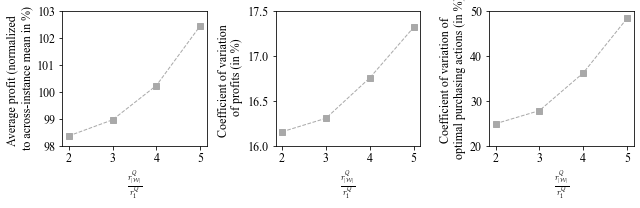

In [11]:
#get purchasing volatilities
purchasing_means = {i: np.average([i for i in range(13)], weights=purchasing_weights[i]) for i in instances}
purchasing_variances = {i: np.average([(k - purchasing_means[i])**2 for k in range(13)], weights=purchasing_weights[i]) for i in instances}
print(purchasing_means)
purchasing_stds = {i: np.sqrt(purchasing_variances[i]) for i in instances}
purchasing_covs = {i: purchasing_stds[i]/purchasing_means[i] for i in instances}

#create plot of purchasing covs dependent on ps
#set fontsize
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
# Enable LaTeX rendering for `\textbf`
plt.rcParams['text.usetex'] = False
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)


fig, ax = plt.subplots(1, 3, figsize=(9,3))

#calculate significance of difference in purchasing covs between different levels of ps using paired t-test
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp
print("T-test for purchasing covs between different levels of ps")
for i in range(len(ps_levels)):
    for j in range(i+1, len(ps_levels)):
        print(ps_levels[i], ps_levels[j], ttest_rel(np.array([purchasing_covs[k] for k in instances if k[2] == ps_levels[i]]),np.array([purchasing_covs[k] for k in instances if k[2] == ps_levels[j]])))

#calculate significance of difference in purchasing covs between different levels of sr using paired t-test
print("T-test for purchasing covs between different levels of sr")
for i in range(len(sr_levels)):
    for j in range(i+1, len(sr_levels)):
        print(sr_levels[i], sr_levels[j], ttest_rel(np.array([purchasing_covs[k] for k in instances if k[1] == sr_levels[i]]),np.array([purchasing_covs[k] for k in instances if k[1] == sr_levels[j]])) )



ax[2].plot(sr_levels, [np.mean([purchasing_covs[i] for i in instances if i[1]==sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
#add std as error bars
ax[2].set_ylabel("Coefficient of variation of \n optimal purchasing actions (in %)")
ax[2].set_xlabel("$\\frac{r^Q_{|\mathcal{W}|}}{r^Q_1}$")
ax[2].set_xticks(sr_levels)
ax[2].set_yticks([0.2, 0.3, 0.4, 0.5], ["20","30","40","50"])


# ax2 = ax[2].twiny()
# ax2.plot(sr_levels, [np.mean([purchasing_covs[i] for i in instances if i[1]==sr]) for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
# ax2.set_xlabel("$\\frac{r^{Q}_{|\mathcal{W}|}}{r^{Q}_1}$")
# ax2.set_xticks(sr_levels)


#create plot of average profits dependent on ps
ax[0].plot(sr_levels, [np.mean([avg_profits[i] for i in instances if i[1]==sr])/np.mean([avg_profits[i] for i in instances]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax[0].set_ylabel("Average profit (normalized \n to across-instance mean in %)")
ax[0].set_xlabel("$\\frac{r^Q_{|\mathcal{W}|}}{r^Q_1}$")
ax[0].set_xticks(sr_levels)
ax[0].set_yticks([98, 99, 100, 101, 102, 103])

# ax2 = ax[0].twiny()
# ax2.plot(sr_levels, [np.mean([avg_profits[i] for i in instances if i[1]==sr])/np.mean([avg_profits[i] for i in instances]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
# ax2.set_xlabel("$\\frac{r^{Q}_{|\mathcal{W}|}}{r^{Q}_1}$")
# ax2.set_xticks(sr_levels)

#create plot of average profit std dependent on ps
ax[1].plot(sr_levels, [np.mean([np.std(profits[i])/avg_profits[i] for i in instances if i[1] == sr]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
ax[1].set_ylabel("Coefficient of variation \n of profits (in %)")
ax[1].set_xlabel("$\\frac{r^Q_{|\mathcal{W}|}}{r^Q_1}$")
ax[1].set_xticks(sr_levels)
ax[1].set_yticks([16, 16.5, 17, 17.5], ["16.0", "16.5", "17.0", "17.5"])

# ax2 = ax[2].twiny()
# ax2.plot(sr_levels, [np.mean([np.std(profits[i])/avg_profits[i] for i in instances if i[1] == sr]) * 100 for sr in sr_levels], marker='s', color="darkgrey", linestyle="--", linewidth=1)
# ax2.set_xlabel("$\\frac{r^{Q}_{|\mathcal{W}|}}{r^{Q}_1}$")
# ax2.set_xticks(sr_levels)

fig.tight_layout()

plt.savefig(f"{os.getcwd()}\\Figures\\effect_amelioration.pdf")
plt.show()


In [9]:
import scipy.stats as stats
#conduct paired t-tests for the effect of price volatility on the average profit
for ps in ps_levels:
    profits_ps = [avg_profits[i] for i in instances if i[2] == ps]
    for ps2 in ps_levels:	
        profits_ps2 = [avg_profits[i] for i in instances if i[2] == ps2]
        print(f"t-test for ps={ps} and ps={ps2}: ", stats.ttest_rel(profits_ps, profits_ps2))

t-test for ps=15 and ps=15:  TtestResult(statistic=nan, pvalue=nan, df=7)
t-test for ps=15 and ps=20:  TtestResult(statistic=-7.65550698837645, pvalue=0.0001205965047118153, df=7)
t-test for ps=15 and ps=25:  TtestResult(statistic=-7.898149065067692, pvalue=9.891102712486322e-05, df=7)
t-test for ps=15 and ps=30:  TtestResult(statistic=-8.081405021930017, pvalue=8.543841315347602e-05, df=7)
t-test for ps=20 and ps=15:  TtestResult(statistic=7.65550698837645, pvalue=0.0001205965047118153, df=7)
t-test for ps=20 and ps=20:  TtestResult(statistic=nan, pvalue=nan, df=7)
t-test for ps=20 and ps=25:  TtestResult(statistic=-8.104953236040712, pvalue=8.386262109419549e-05, df=7)
t-test for ps=20 and ps=30:  TtestResult(statistic=-8.254436313860616, pvalue=7.459291720430973e-05, df=7)
t-test for ps=25 and ps=15:  TtestResult(statistic=7.898149065067692, pvalue=9.891102712486322e-05, df=7)
t-test for ps=25 and ps=20:  TtestResult(statistic=8.104953236040712, pvalue=8.386262109419549e-05, df=7)
t

In [5]:
#compare to upper bound
instances = [(i,j,k) for i in [3,5] for j in [2,3,4,5] for k in [15,20,25,30]]
approximations = {}
ub = {}
methods = ["MDP", "Tree-based", "$R^{Pu}$", "$R^{Pr}$", "$R^{Is}$", "$R^{PuPr}$", "$R^{PuIs}$", "$R^{PrIs}$", "$R^{T}$"]
method_names = ["MDP", "TreeBased", "PuAp", "SAp", "PrAp", "PuSAp", "PuPrAp", "BAp", "TAp"]
#load results from approximations
for i in instances:
    currentInstance = f"2nP_{i[0]}sF_PUpU_{i[1]}sprRev_0.25oDP_{i[2]}pS"
    approximations[i] = json.load(open(f"{os.getcwd()}\Results\{currentInstance}_MDP_approximations.json"))
    approximations[i]["TreeBased"] = json.load(open(f"{os.getcwd()}\Analysis\TreeBased_Aggregated\{currentInstance}_Simulation_Prediction.json"))["averageReward"]
    ub[i] = json.load(open(f"{os.getcwd()}\ScaledCase\{currentInstance}_Opt.json"))
    print("Loaded ", currentInstance)

ub_profits = {i: ub[i]["ub_base"]["ub"] for i in instances}
ub_gap_approximations = {i: {m: (ub_profits[i] - approximations[i][m])/ub_profits[i] for m in method_names} for i in instances}
print(ub_gap_approximations)




Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_30pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_15pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_20pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_25pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_30pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_15pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_20pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_25pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25o

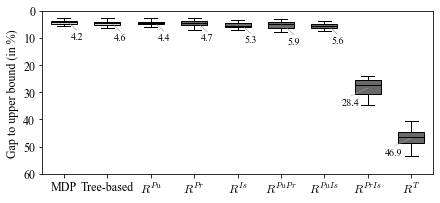

In [6]:
#create boxplot of upper bound gap for each method
ub_gap_levels = {m: [ub_gap_approximations[i][m] for i in instances] for m in method_names}

# Create the boxplot
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots((1), figsize=(7,3))
#add boxplot with default colors
box = plt.boxplot(ub_gap_levels.values(), patch_artist=True, showfliers=False, widths=0.6, boxprops=dict(facecolor="lightgrey"), whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="black") )
#change approximation boxes to dimgrey
for i in range(2,9):
    for j in range(len(instances)):
        box['boxes'][i].set_facecolor('dimgrey')


plt.xticks([1,2,3,4,5,6,7,8,9], methods)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6], ["0","10","20","30","40","50", "60"])
plt.ylim(0,0.6)
plt.ylabel("Gap to upper bound (in %)")

#add text annotation showing mean values
for i, m in enumerate(method_names):
    if i < 7:
        plt.text(i+1.3, np.mean(ub_gap_levels[m]) + 0.07, f"{np.mean(ub_gap_levels[m])*100:.1f}", ha='center', va='bottom', fontsize=10)
        #add line to mean value
        plt.plot([i+1.1, i+1.3], [np.mean(ub_gap_levels[m]), np.mean(ub_gap_levels[m])+0.03], color='grey', linewidth=0.5)
    else:
        plt.text(i+0.6, np.mean(ub_gap_levels[m]) + 0.07, f"{np.mean(ub_gap_levels[m])*100:.1f}", ha='center', va='bottom', fontsize=10)
        #add line to mean value
        plt.plot([i+1, i+0.6], [np.mean(ub_gap_levels[m]), np.mean(ub_gap_levels[m])+0.03], color='darkgrey', linewidth=0.5)


#flip y-axis
plt.gca().invert_yaxis()


plt.savefig(f"{os.getcwd()}\\Figures\\ub_gap.pdf", bbox_inches='tight')
plt.show()


In [38]:
#calculate average gap from tree-based to mdp

tree_based_gap = {i: (approximations[i]["MDP"] - approximations[i]["TreeBased"])/approximations[i]["MDP"] for i in instances}

print("average gap tree-based to mdp: ", np.mean([tree_based_gap[i] for i in instances]))

average gap tree-based to mdp:  0.003828177250225744


In [39]:
#get upper bound gaps for large instances
instances_large = [i for i in instances if i[0] == 3]
ub_profits_large = {i: ub[i]["ub_large"]["ub"] for i in instances_large}
approximations_large = {}

for i in instances_large:
    currentInstance = f"2nP_{i[0]}sF_PUpU_{i[1]}sprRev_0.25oDP_{i[2]}pS"
    approximations_large[i] = json.load(open(f"{os.getcwd()}\Analysis\PurchasingAmount\{currentInstance}_ScaleSimulation.json"))["avgProfits"]
    print("Loaded ", currentInstance)

ub_gap_approximations_large = {i: (ub_profits_large[i] - approximations_large[i])/ub_profits_large[i] for i in instances_large}
print(ub_gap_approximations_large)
print(np.mean([ub_gap_approximations_large[i] for i in instances_large]))

Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_30pS
{(3, 2, 15): 0.025548161905232743, (3, 2, 20): 0.03463559894347651, (3, 2, 25): 0.03815662950204938, (3, 2, 30): 0.04154634964129011, (3, 3, 15): 0.02281775656841171, (3, 3, 20): 0.030532959093780006, (3, 3, 25): 0.0334836946235393, (3, 3, 30): 0.034928335751213124, (3, 4, 15): 0.022290188104909823, (3, 4, 20): 0.0272428301879

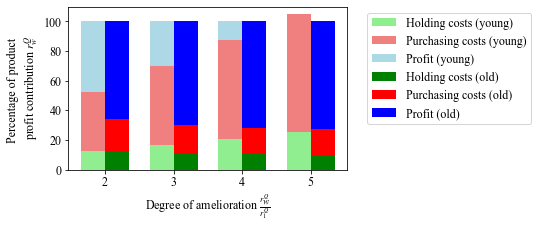

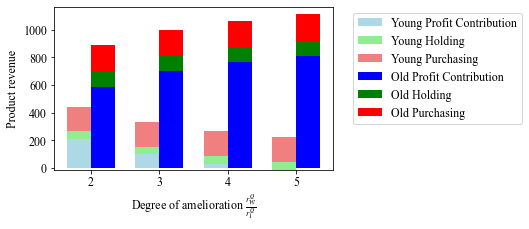

In [66]:
acc_holding_young = 56.03885502
acc_holding_old = 112.1702278

acc_purchasing_young = 177.4760325
acc_purchasing_old = 189.4016887

decay_p = [0.10547303,0.055160353,0.037256522,0.026703236,0.019760072]

revenue_young = {2: 20000/45, 3: 1000/3, 4: 12000/45, 5: 10000/45}
revenue_old = {i: revenue_young[i]*i for i in revenue_young.keys()}

#create a bar plot for the profit margins for young and old as a stacked bar in percent of the total revenue indicating holding costs and purchasing costs
#set fontsize
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rcParams['mathtext.fontset'] = 'stix'

young_margin = {i: (revenue_young[i] - acc_holding_young - acc_purchasing_young)/revenue_young[i] for i in revenue_young.keys()}
old_margin = {i: (revenue_old[i] - acc_holding_old - acc_purchasing_old)/revenue_old[i] for i in revenue_old.keys()}

young_abs_margin = {i: (revenue_young[i] - acc_holding_young - acc_purchasing_young) for i in revenue_young.keys()}
old_abs_margin = {i: (revenue_old[i] - acc_holding_old - acc_purchasing_old) for i in revenue_old.keys()}

# Convert margins and revenues into arrays for plotting
labels = list(revenue_young.keys())
young_profit = [max(0,young_margin[i]) for i in labels]
old_profit = [old_margin[i] for i in labels]

# Holding and purchasing costs as percentage of revenue
young_holding = [acc_holding_young / revenue_young[i] for i in labels]
young_purchasing = [acc_purchasing_young / revenue_young[i] for i in labels]
old_holding = [acc_holding_old / revenue_old[i] for i in labels]
old_purchasing = [acc_purchasing_old / revenue_old[i] for i in labels]

# Adjust the code to create separate bars for young and old products
fig, ax = plt.subplots(1, 1, figsize=(5,3))

bar_width = 0.35
index = np.arange(len(labels))

# Plot young and old as separate stacked bars side by side
ax.bar(index - bar_width/2, young_holding, bar_width, bottom=0, label="Holding costs (young)", color='lightgreen')
ax.bar(index - bar_width/2, young_purchasing, bar_width, bottom=young_holding, label="Purchasing costs (young)", color='lightcoral')
ax.bar(index - bar_width/2, young_profit, bar_width, bottom=[i+j for i,j in zip(young_purchasing, young_holding)], label="Profit (young)", color='lightblue')

ax.bar(index + bar_width/2, old_holding, bar_width, bottom=0, label="Holding costs (old)", color='green')
ax.bar(index + bar_width/2, old_purchasing, bar_width, bottom=old_holding, label="Purchasing costs (old)", color='red')
ax.bar(index + bar_width/2, old_profit, bar_width, bottom=[i+j for i,j in zip(old_purchasing, old_holding)], label="Profit (old)", color='blue')

# Labels and settings
ax.set_ylabel("Percentage of product \n profit contribution $r^Q_w$")
ax.set_xlabel("Degree of amelioration $\\frac{r^Q_{\\mathcal{W}}}{r^Q_1}$")
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ["0", "20", "40", "60", "80", "100"])
ax.set_ylim(0,1.1)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig(f"{os.getcwd()}\\Figures\\profit_margins.pdf", bbox_inches='tight')

#create the same boxplot but with absolute values

fig, ax = plt.subplots(1, 1, figsize=(5,3))

# Plot young and old as separate stacked bars side by side
ax.bar(index - bar_width/2, [young_abs_margin[i] for i in labels], bar_width, label="Young Profit Contribution", color='lightblue')
ax.bar(index - bar_width/2, [acc_holding_young for i in labels], bar_width, bottom=[young_abs_margin[i] for i in labels], label="Young Holding", color='lightgreen')
ax.bar(index - bar_width/2, [acc_purchasing_young for i in labels], bar_width, bottom=[i+j for i,j in zip([young_abs_margin[i] for i in labels], [acc_holding_young for i in labels])], label="Young Purchasing", color='lightcoral')
       
ax.bar(index + bar_width/2, [old_abs_margin[i] for i in labels], bar_width, label="Old Profit Contribution", color='blue')
ax.bar(index + bar_width/2, [acc_holding_old for i in labels], bar_width, bottom=[old_abs_margin[i] for i in labels], label="Old Holding", color='green')
ax.bar(index + bar_width/2, [acc_purchasing_old for i in labels], bar_width, bottom=[i+j for i,j in zip([old_abs_margin[i] for i in labels], [acc_holding_old for i in labels])], label="Old Purchasing", color='red')

# Labels and settings
ax.set_ylabel("Product revenue")
ax.set_xlabel("Degree of amelioration $\\frac{r^Q_{\\mathcal{W}}}{r^Q_1}$")
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')






In [52]:
#calculate profit margins as in results

#determine revenues for young and old product
revenue_young = {2: 20000/45, 3: 1000/3, 4: 12000/45, 5: 10000/45}
revenue_old = {i: revenue_young[i]*i for i in revenue_young.keys()}

rev_y = {}
rev_o = {}
h_y = {}
h_o = {}
salv = {}
h_t = {}
avg_p = {}
acc_h = [1/np.prod([decay_p[j] for j in range(i+1)]) for i in range(5)]
#add purchasing mean at first position of avg_inv_p
avg_inv_pp = {i: np.concatenate(([purchasing_means[i]],avg_inv_p[i][:-1])) for i in instances}


for i in instances:
    rev_y[i] = revenue_young[i[1]] *  resultsUFF[i][0] * 4
    rev_o[i] = revenue_old[i[1]] * resultsUFF[i][1] * 4
    h_y[i] = sum([acc_h[j] * Issuance[i]["1"][j] for j in range(5)]) * 25
    h_o[i] = sum([acc_h[j] * Issuance[i]["2"][j] for j in range(5)]) * 25
    h_t[i] = sum(avg_inv_pp[i]) * 25
    avg_p[i] = sum([price_levels[p]*yieldProbability[i[2]][p]*np.dot(price_purchasing[i][str(p)],[k for k in range(13)]) for p in range(len(price_levels))])
    salv[i] = sum(decay_p[j] * avg_inv_pp[i][j] for j in range(5)) * 25

print("avg purchasing: ", avg_p)
print("avg diff: ", salv)






avg purchasing:  {(3, 2, 15): 1420.8181214963602, (3, 2, 20): 1405.7103623414498, (3, 2, 25): 1388.2610670920587, (3, 2, 30): 1368.1136242332311, (3, 3, 15): 1383.5536354215344, (3, 3, 20): 1355.6132644065956, (3, 3, 25): 1322.7171680689742, (3, 3, 30): 1285.688507652879, (3, 4, 15): 1271.2680700022772, (3, 4, 20): 1218.9838444564416, (3, 4, 25): 1163.7734158845738, (3, 4, 30): 1106.244699854043, (3, 5, 15): 1015.705288864149, (3, 5, 20): 989.5293969532918, (3, 5, 25): 960.0548830216329, (3, 5, 30): 928.685040336704, (5, 2, 15): 1419.0243532498635, (5, 2, 20): 1404.045974606053, (5, 2, 25): 1386.330033517338, (5, 2, 30): 1366.5632848162547, (5, 3, 15): 1382.487487158507, (5, 3, 20): 1354.32824784754, (5, 3, 25): 1321.0821960804733, (5, 3, 30): 1284.7795289474307, (5, 4, 15): 1270.7505085102346, (5, 4, 20): 1218.7172405373688, (5, 4, 25): 1163.693830199182, (5, 4, 30): 1105.933497768638, (5, 5, 15): 1015.6933312380727, (5, 5, 20): 989.8067044703322, (5, 5, 25): 959.855697065557, (5, 5, 

{(3, 2, 25): 3225.4367168619765, (3, 3, 25): 3235.463874859586, (3, 4, 25): 3263.656511667144, (3, 5, 25): 3322.5581166723814}


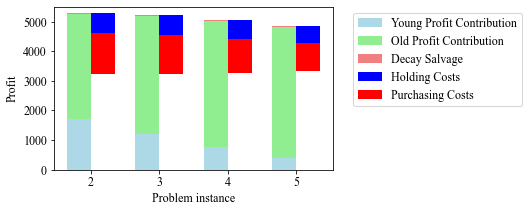

In [64]:
#plot all profit components as stacked bar plot for each instance individually
#set fontsize
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots(1, 1, figsize=(5,3))

bar_width = 0.35
index = np.arange(4)

prof = {i: rev_y[i] + rev_o[i] + salv[i] - h_t[i] - avg_p[i] for i in instances if i[0] == 3 and i[2] == 25}

print(prof)

#stack revenues and salv
ax.bar(index-0.175, [rev_y[i] for i in instances if i[0] == 3 and i[2] == 25], bar_width, label="Young Profit Contribution", color='lightblue')
ax.bar(index-0.175, [rev_o[i] for i in instances if i[0] == 3 and i[2] == 25], bar_width, bottom=[rev_y[i] for i in instances if i[0] == 3 and i[2] == 25], label="Old Profit Contribution", color='lightgreen')
ax.bar(index-0.175, [salv[i] for i in instances if i[0] == 3 and i[2] == 25], bar_width, bottom=[(rev_y[i] + rev_o[i]) for i in instances if i[0] == 3 and i[2] == 25], label="Decay Salvage", color='lightcoral')

#stack holding and purchasing costs negatively
ax.bar(index+0.175, [-h_t[i] for i in instances if i[0] == 3 and i[2] == 25], bar_width, bottom=[(rev_y[i]+rev_o[i]+salv[i]) for i in instances if i[0] == 3 and i[2] == 25], label="Holding Costs", color='blue')
ax.bar(index+0.175, [-avg_p[i] for i in instances if i[0] == 3 and i[2] == 25], bar_width, bottom=[(rev_y[i] + rev_o[i]+salv[i]-h_t[i]) for i in instances if i[0] == 3 and i[2] == 25], label="Purchasing Costs", color='red')

# Labels and settings
ax.set_ylabel("Profit")
ax.set_xlabel("Problem instance")
ax.set_xticks(index, sr_levels)
ax.set_ylim(0,5500)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig(f"{os.getcwd()}\\Figures\\profit_components.pdf", bbox_inches='tight')
plt.show()